### Kaggle Titanic Dataset to predict survived people

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve
import warnings
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

#### Import Data

In [3]:
train_df = pd.read_csv('train1.csv')

test_df = pd.read_csv('test1.csv')

sample_df = pd.read_csv('gender_submission.csv')

In [4]:
train_df['Source'] = 'train'

test_df['Source'] = 'test'

In [5]:
df = pd.concat([train_df, test_df])

#### Exploratory Data Analysis

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [7]:
df.reset_index(drop = True, inplace=True)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


<AxesSubplot:>

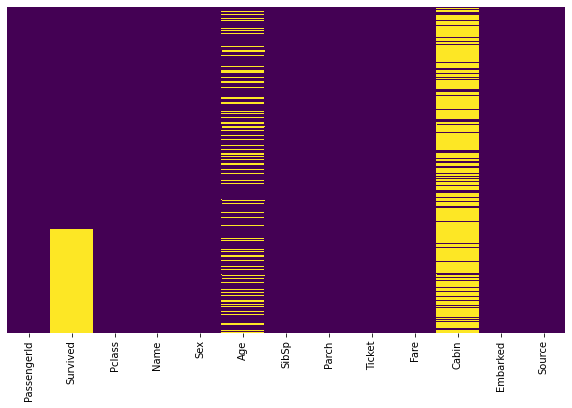

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Cabin has more missing values, we can impute age null values by mean of pclass group

Let's continue to do more insights

<AxesSubplot:xlabel='Survived', ylabel='count'>

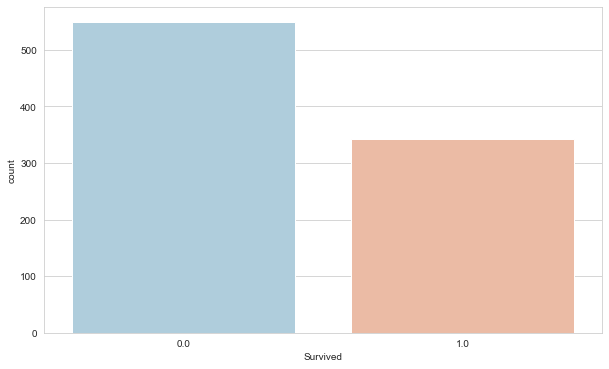

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',data=df,palette='RdBu_r')
#looks like more people were not survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

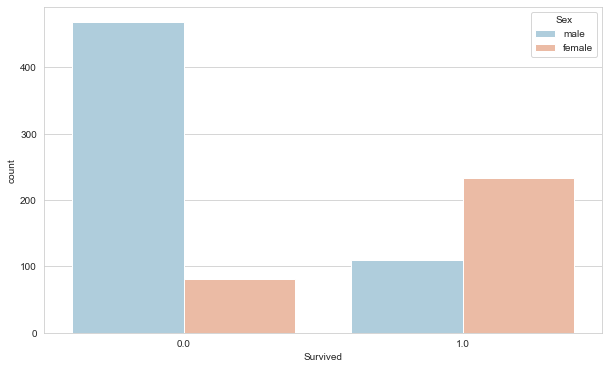

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

More deaths are Male, whereas more survived people are female

<AxesSubplot:xlabel='Survived', ylabel='count'>

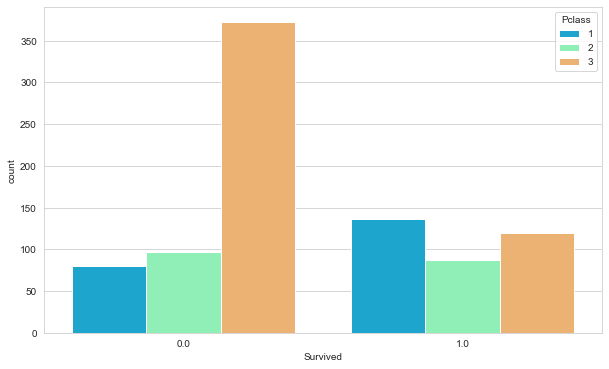

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

Most of the not survived people were travelled in 3rd class 

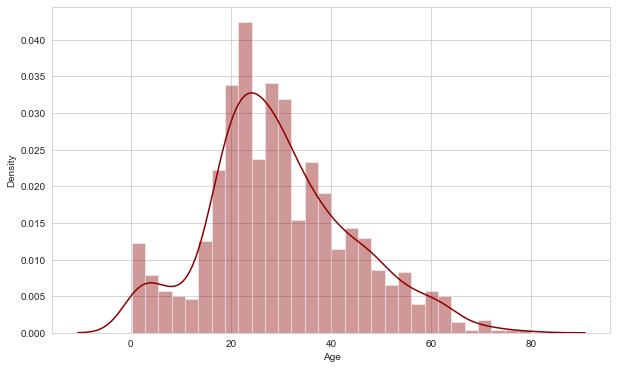

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(df['Age'].dropna(),color='darkred',bins=30);

People's age is falling in the bin between 20-35, it follows a normal distribution

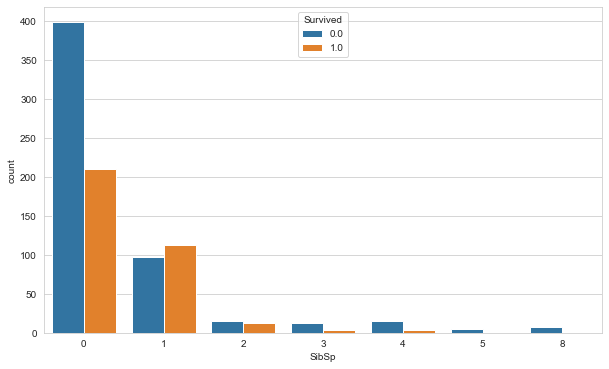

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='SibSp',data=df, hue='Survived');

Sibsp - Number of Siblings/Spouses Aboard.
From the above count plot it clearly says most of the people who travelled have no Siblings/Spouses Abroad 

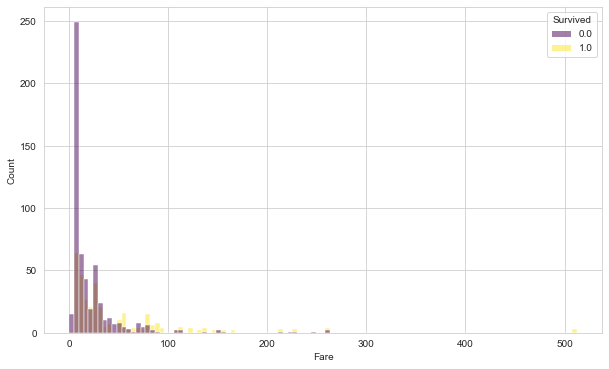

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(x = 'Fare', data = df, hue='Survived', palette='viridis');

From the above graph we can say  most of the people who were not survived tralleved in a low ticket fare

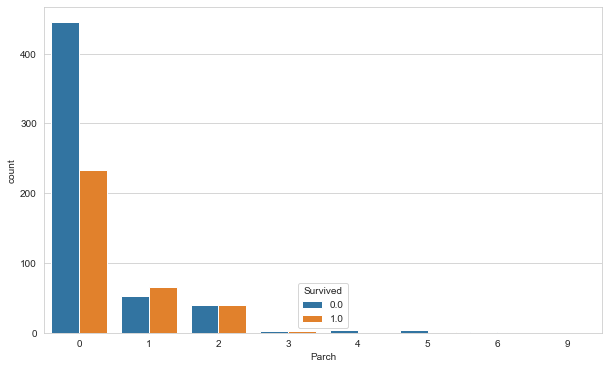

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Parch', data = df, hue ='Survived');

Parch - Number of Parents/Children Aboard.
People with no Parents/Children Aboard travelled in the titanic ship

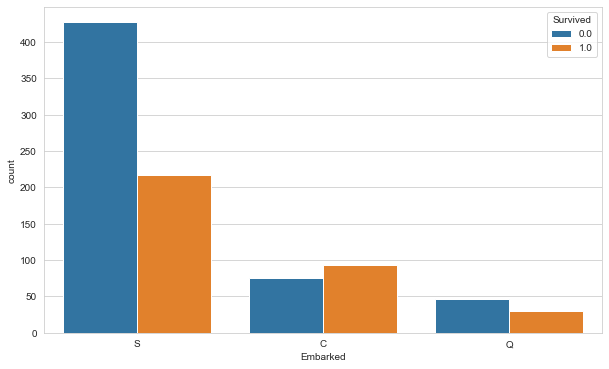

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Embarked', data=df, hue='Survived');

Embark — S-Southampton, C-Cherbourg, and Q-Queenstown
from the above graph we can the most people are embarked from Southampton

#### Data Cleaning

Instead of removing Age column, we can replace the null values in Age column by mean of Age w.r.t Passenger Class

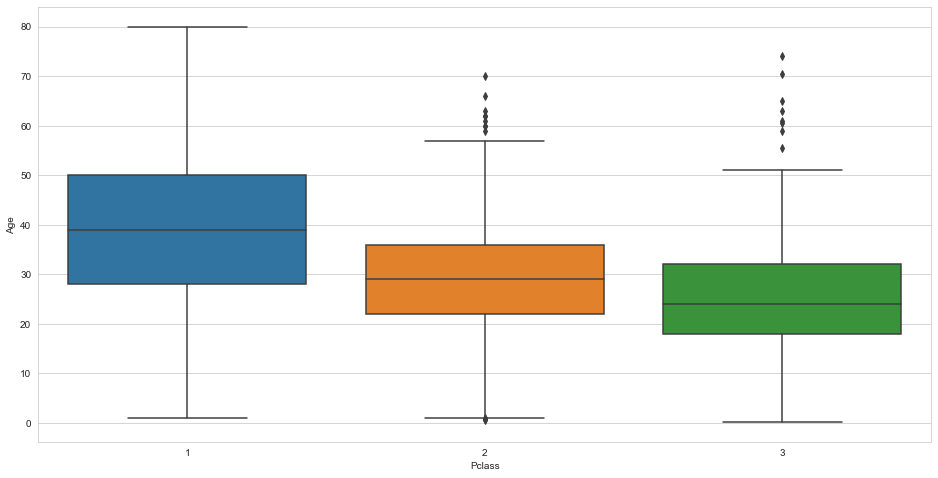

In [18]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Pclass', y='Age' , data = df);

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [19]:
df.loc[0:100,['PassengerId','Survived','Name']]

,PassengerId,Survived,Name
0,1,0.0,"Braund, Mr. Owen Harris"
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1.0,"Heikkinen, Miss. Laina"
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0.0,"Allen, Mr. William Henry"
...,...,...,...
96,97,0.0,"Goldschmidt, Mr. George B"
97,98,1.0,"Greenfield, Mr. William Bertram"
98,99,1.0,"Doling, Mrs. John T (Ada Julia Bone)"
99,100,0.0,"Kantor, Mr. Sinai"


In [20]:
df.loc[df['Fare']==0,['PassengerId','Survived']]

,PassengerId,Survived
179,180,0.0
263,264,0.0
271,272,1.0
277,278,0.0
302,303,0.0
413,414,0.0
466,467,0.0
481,482,0.0
597,598,0.0
633,634,0.0


#### Feature Engineering

In [21]:
#finding the mean age based on the class
df.groupby('Pclass')['Age'].mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [22]:
pclass_1 = 39
pclass_2 = 30
pclass_3 = 25

In [23]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return pclass_1

        elif Pclass == 2:
            return pclass_2

        else:
            return pclass_3

    else:
        return Age

In [24]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

Let's see heatmap again

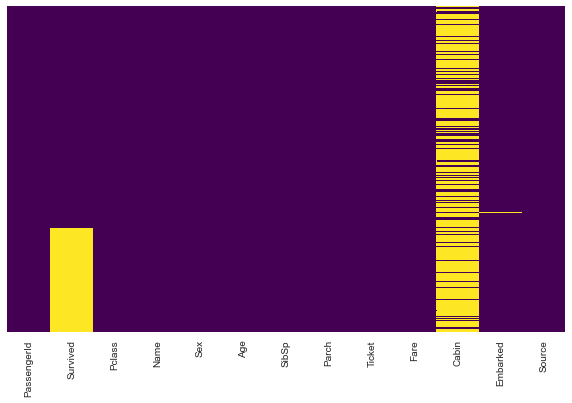

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [26]:
df['Cabin_1st'] = df['Cabin'].apply(lambda x : str(x)[0])

In [27]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace= True)

In [28]:
#Fare column has null value in test data, we can't drop it, so I replaced with median value
df['Fare'].fillna(df.Fare.median(), inplace=True)

In [29]:
df['Relatives'] = df['SibSp'] + df ['Parch']

In [30]:
df['Relatives']

0       1
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    2
Name: Relatives, Length: 1309, dtype: int64

In [31]:
#to find insight in name columns
def split(i):
    pattern = ['Mr.', 'Mrs', 'Master', 'Miss', 'Rev', 'Don', 'Capt', 'Dr', 'Mme', 'Ms', 'Major', 'Col', 'Jonkheer', 'Mlle', 'Countess', 'Sir']
    for y in pattern:
        if y in i:
            return y
    else :
        return np.nan

In [32]:
split(df['Name'][0])

'Mr.'

In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source,Cabin_1st,Relatives
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,n,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,n,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,C,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,n,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,NaN,S,test,n,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test,C,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test,n,0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,NaN,S,test,n,0


In [34]:
df['Title'] = df['Name'].apply(split)

In [35]:
df[['Title','Name']]

,Title,Name
0,Mr.,"Braund, Mr. Owen Harris"
1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,Miss,"Heikkinen, Miss. Laina"
3,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,Mr.,"Allen, Mr. William Henry"
...,...,...
1304,Mr.,"Spector, Mr. Woolf"
1305,Don,"Oliva y Ocana, Dona. Fermina"
1306,Mr.,"Saether, Mr. Simon Sivertsen"
1307,Mr.,"Ware, Mr. Frederick"


In [36]:
#reducing the cardinality
df['Title'] = df['Title'].replace('Ms', 'Miss').replace('Mme', 'Mrs').replace('Sir', 'Mr.').replace('Mr.','Mr').replace('Mlle','Mrs')

In [37]:
df['Title'].isna().sum()

0

In [38]:
#Taking ticket num into a new variable
def last_digit(i):
    return i.split()[-1]

In [39]:
df['Ticket_num'] = df['Ticket'].apply(last_digit)

In [40]:
df[['Ticket_num', 'Ticket']]

,Ticket_num,Ticket
0,21171,A/5 21171
1,17599,PC 17599
2,3101282,STON/O2. 3101282
3,113803,113803
4,373450,373450
...,...,...
1304,3236,A.5. 3236
1305,17758,PC 17758
1306,3101262,SOTON/O.Q. 3101262
1307,359309,359309


In [41]:
df[df['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source,Cabin_1st,Relatives,Title,Ticket_num
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,train,n,0,Mr,LINE
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,train,B,0,Mr,112059
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,train,n,0,Mr,LINE
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,30.0,0,0,239853,0.0,NaN,S,train,n,0,Mr,239853
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,train,n,0,Mr,LINE
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,30.0,0,0,239853,0.0,NaN,S,train,n,0,Mr,239853
466,467,0.0,2,"Campbell, Mr. William",male,30.0,0,0,239853,0.0,NaN,S,train,n,0,Mr,239853
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30.0,0,0,239854,0.0,NaN,S,train,n,0,Mr,239854
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,train,n,0,Mr,LINE
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,39.0,0,0,112052,0.0,NaN,S,train,n,0,Mr,112052


In [42]:
df['Ticket_num'].nunique()

924

In [43]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Relatives
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.378663,0.498854,0.385027,33.281086,0.883881
std,378.020061,0.486592,0.837836,13.114583,1.041658,0.865560,51.741500,1.583639
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,1.000000,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,10.000000


In [44]:
#Don't think it as a error, just checking for presence of any other value
df['Ticket_num'].astype(int)

ValueError: invalid literal for int() with base 10: 'LINE'

#### Look's like ticket variable has String value, converting string value into the numerical values

In [45]:
for index,num in enumerate(df['Ticket_num']):
    if 'LINE' in num:
        df.iloc[index,-1] = '12345'
        
        print(index,num)

179 LINE
271 LINE
302 LINE
597 LINE


In [46]:
df['Ticket_num'] = df['Ticket_num'].astype(int)

#### Scaling 

In [47]:
sc = StandardScaler()

In [48]:
scaler = pd.DataFrame(sc.fit_transform(df[['Age', 'Ticket_num', 'Fare']]), columns= ['Age', 'Ticket_num', 'Fare'])

In [49]:
scaler_not =df[['Age', 'Ticket_num', 'Fare']]

#### Encoding

In [50]:
#Encoding Sex , Embarked, Title and Passenger Class columns
sex = pd.get_dummies(data = df['Sex'], prefix='Sex', drop_first=True )

embarked = pd.get_dummies(data = df['Embarked'], prefix='Embark', drop_first=True)

pclass = pd.get_dummies(data = df['Pclass'], prefix='Pcls', drop_first=True)

title = pd.get_dummies(df['Title'], prefix='Tit', drop_first=True)

cabin = pd.get_dummies(df['Cabin_1st'], prefix='Cab', drop_first=True)

relative = pd.get_dummies(df['Relatives'], prefix='Rel', drop_first=True)

In [51]:
final_data = df.drop(['Age', 'Ticket_num', 'Fare', 'Sex', 'Embarked', 'Pclass', 'Title', 'Name', 'Relatives', 'PassengerId', 'Ticket', 'SibSp', 'Parch','Cabin', 'Cabin_1st'], axis = 1)

In [52]:
final_concat_data = pd.concat([final_data, scaler, sex, embarked, pclass, title, cabin, relative], axis = 1)

In [53]:
final_concat_data_1=pd.DataFrame(sc.fit_transform(final_concat_data.iloc[:,2:]), columns= final_concat_data.columns[2:])

In [54]:
final_concat_data_1 = pd.concat([final_data,final_concat_data_1],axis=1)

In [55]:
final_concat_data.head()

,Survived,Source,Age,Ticket_num,Fare,Sex_male,Embark_Q,Embark_S,Pcls_2,Pcls_3,Tit_Col,Tit_Countess,Tit_Don,Tit_Dr,Tit_Jonkheer,Tit_Major,Tit_Master,Tit_Miss,Tit_Mr,Tit_Mrs,Tit_Rev,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_T,Cab_n,Rel_1,Rel_2,Rel_3,Rel_4,Rel_5,Rel_6,Rel_7,Rel_10
0,0.0,train,-0.562845,-0.412413,-0.503291,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,1.0,train,0.657637,-0.418037,0.734744,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1.0,train,-0.257725,4.437124,-0.490240,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.0,train,0.428796,-0.266567,0.383183,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.0,train,0.428796,0.142239,-0.487824,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


#### Spliting

In [56]:
final_train_data = final_concat_data[final_concat_data['Source'] == 'train']

final_test_data = final_concat_data[final_concat_data['Source'] == 'test']

In [57]:
X_train = final_train_data.drop(['Source', 'Survived'], axis = 1)

y_train = final_train_data['Survived']
y_train = y_train.astype(int) #Since it is float type

X_test = final_test_data.drop(['Source', 'Survived'], axis = 1)

#### Modelling

In [58]:
lg = LogisticRegression()

lg.fit(X_train, y_train)

LogisticRegression()

In [59]:
train_pred = lg.predict(X_train)

test_pred = lg.predict(X_test)

In [60]:
#Confusion Matrix
confusion_matrix(y_train, train_pred)

array([[486,  63],
       [ 76, 266]], dtype=int64)

In [61]:
#Accuracy Score
accuracy_score(y_train, train_pred)

0.8439955106621774

In [62]:
y_train.sum()

342

In [63]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       549
           1       0.81      0.78      0.79       342

    accuracy                           0.84       891
   macro avg       0.84      0.83      0.83       891
weighted avg       0.84      0.84      0.84       891



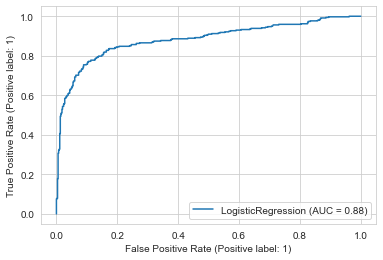

In [52]:
plot_roc_curve(lg, X_train, y_train)

In [64]:
sample_df['Survived'] = test_pred

sample_df.to_csv('Log Prediction.csv', index = False )

In [65]:
y_train.shape[0] - y_train.sum()

549

In [66]:
weight = y_train.shape[0]/(2 * 549)

In [67]:
weight

0.8114754098360656

In [68]:
lg = LogisticRegression(class_weight={1:0.6,0:0.811})

lg.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.811, 1: 0.6})

In [69]:
train_pred_1 = lg.predict(X_train)

test_pred_1 = lg.predict(X_test)

In [74]:
print(classification_report(y_train, train_pred_1))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       549
           1       0.85      0.71      0.77       342

    accuracy                           0.84       891
   macro avg       0.84      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891



In [75]:
sample_df['Survived'] = test_pred_1

sample_df.to_csv('Titanic_Sink.csv', index = False )

### Naive Bayes

In [134]:
from sklearn.naive_bayes import GaussianNB

In [135]:
nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

In [149]:
train_pred_nb = nb.predict(X_train)

test_pred_nb = nb.predict(X_test)

In [150]:
confusion_matrix(y_train, train_pred_nb)

array([[ 39, 510],
       [  0, 342]])

In [140]:
accuracy_score(y_train, train_pred_nb)

0.4276094276094276

In [152]:
sample_df['Survived'] = test_pred_nb

sample_df.to_csv('Naive Prediction.csv', index = False )

#### K Nearest Neighbours

In [143]:
from sklearn.neighbors import KNeighborsClassifier

In [206]:
knn = KNeighborsClassifier(n_neighbors=13,n_jobs=-1)

In [207]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=13)

In [208]:
train_pred_knn = knn.predict(X_train)

In [209]:
confusion_matrix(y_train, train_pred_knn)

array([[507,  42],
       [101, 241]])

In [210]:
accuracy_score(y_train, train_pred_knn)

0.8395061728395061

In [211]:
test_pred_knn = knn.predict(X_test)

In [212]:
sample_df['Survived'] = test_pred_knn

sample_df.to_csv('KNN_13.csv', index = False )

In [175]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != test_pred_knn))

Text(0, 0.5, 'Error Rate')

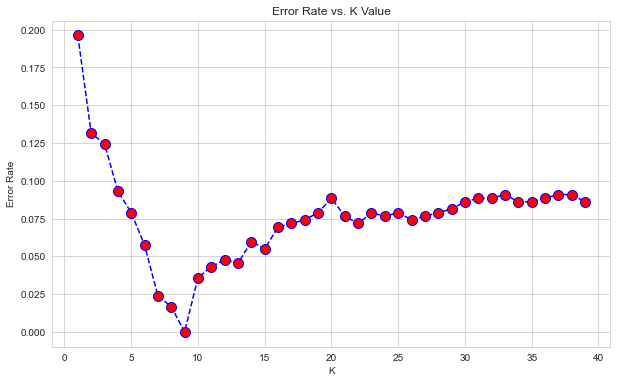

In [176]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
dtree.score(X_train,y_train)

0.9988776655443322

In [54]:
test_pred_dt = dtree.predict(X_test)

In [55]:
sample_df['Survived'] = test_pred_dt

sample_df.to_csv('decision_tree.csv', index = False )

In [ ]:
confusion_matrix(y_train, train_pred_knn)

### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
rf.score(X_train,y_train)

0.9988776655443322

In [ ]:
rf.m

In [60]:
test_pred_rf = rf.predict(X_test)

In [62]:
sample_df['Survived'] = test_pred_rf

sample_df.to_csv('Random_forest.csv', index = False )

####  XGBoost

In [40]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [41]:
xgb = XGBClassifier()

In [42]:
xgb.fit(X_train,y_train)

[21:39:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
test_pred_xg = xgb.predict(X_test)

In [45]:
sample_df['Survived'] = test_pred_xg

sample_df.to_csv('XGboost1.csv', index = False )

In [48]:
pd.Series(test_pred_xg).value_counts()

0    258
1    160
dtype: int64

In [49]:
y_train.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [50]:
## Hyper Parameter

params = {
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth' : [3, 4, 5, 6, 8, 10, 12 ,15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma' : [0.0,0.1,0.2,0.3,0.4], #less than 1 make sure
    'colsample_bytree':[0.3,0.4,0.5,0.7] #less than 1
}

In [51]:
grid = GridSearchCV(xgb, params, n_jobs=-1, verbose=3, cv=2)

In [52]:
grid.fit(X_train,y_train)

Fitting 2 folds for each of 3840 candidates, totalling 7680 fits
[22:07:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [53]:
grid.best_score_

0.8294175442132312

In [54]:
grid.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.4,
 'learning_rate': 0.3,
 'max_depth': 3,
 'min_child_weight': 1}

In [55]:
test_pred_xg=grid.predict(X_test)

In [56]:
sample_df['Survived'] = test_pred_xg

sample_df.to_csv('XGboost_grid.csv', index = False )

In [57]:
sample_df['Survived'].value_counts()

0    271
1    147
Name: Survived, dtype: int64

#### Cat boost

In [58]:
from catboost import CatBoostClassifier

In [65]:
ct = CatBoostClassifier(iterations=300)

In [60]:
ct.fit(X_train,y_train)

Learning rate set to 0.009807
0:	learn: 0.6868122	total: 71ms	remaining: 1m 10s
1:	learn: 0.6806944	total: 73ms	remaining: 36.4s
2:	learn: 0.6752651	total: 75.1ms	remaining: 25s
3:	learn: 0.6688453	total: 81.7ms	remaining: 20.3s
4:	learn: 0.6629222	total: 85.4ms	remaining: 17s
5:	learn: 0.6564667	total: 88.3ms	remaining: 14.6s
6:	learn: 0.6506630	total: 91.1ms	remaining: 12.9s
7:	learn: 0.6456600	total: 94.3ms	remaining: 11.7s
8:	learn: 0.6404018	total: 96.9ms	remaining: 10.7s
9:	learn: 0.6355810	total: 99.1ms	remaining: 9.81s
10:	learn: 0.6300612	total: 101ms	remaining: 9.12s
11:	learn: 0.6252956	total: 104ms	remaining: 8.54s
12:	learn: 0.6208790	total: 106ms	remaining: 8.06s
13:	learn: 0.6160323	total: 109ms	remaining: 7.69s
14:	learn: 0.6112414	total: 111ms	remaining: 7.32s
15:	learn: 0.6071219	total: 114ms	remaining: 6.98s
16:	learn: 0.6021339	total: 117ms	remaining: 6.78s
17:	learn: 0.5975736	total: 120ms	remaining: 6.55s
18:	learn: 0.5935392	total: 123ms	remaining: 6.37s
19:	lear

167:	learn: 0.3815148	total: 512ms	remaining: 2.54s
168:	learn: 0.3810082	total: 516ms	remaining: 2.54s
169:	learn: 0.3807902	total: 518ms	remaining: 2.53s
170:	learn: 0.3807089	total: 519ms	remaining: 2.51s
171:	learn: 0.3802271	total: 521ms	remaining: 2.5s
172:	learn: 0.3798837	total: 522ms	remaining: 2.5s
173:	learn: 0.3794156	total: 524ms	remaining: 2.49s
174:	learn: 0.3790123	total: 526ms	remaining: 2.48s
175:	learn: 0.3786568	total: 529ms	remaining: 2.48s
176:	learn: 0.3784254	total: 532ms	remaining: 2.47s
177:	learn: 0.3780272	total: 534ms	remaining: 2.46s
178:	learn: 0.3774272	total: 536ms	remaining: 2.46s
179:	learn: 0.3771868	total: 538ms	remaining: 2.45s
180:	learn: 0.3767869	total: 541ms	remaining: 2.45s
181:	learn: 0.3762634	total: 544ms	remaining: 2.44s
182:	learn: 0.3755330	total: 545ms	remaining: 2.43s
183:	learn: 0.3752512	total: 547ms	remaining: 2.43s
184:	learn: 0.3748370	total: 550ms	remaining: 2.42s
185:	learn: 0.3744535	total: 552ms	remaining: 2.42s
186:	learn: 0.

344:	learn: 0.3357165	total: 1.03s	remaining: 1.96s
345:	learn: 0.3355657	total: 1.04s	remaining: 1.96s
346:	learn: 0.3353946	total: 1.04s	remaining: 1.96s
347:	learn: 0.3351892	total: 1.04s	remaining: 1.95s
348:	learn: 0.3349190	total: 1.05s	remaining: 1.95s
349:	learn: 0.3346151	total: 1.05s	remaining: 1.95s
350:	learn: 0.3344792	total: 1.05s	remaining: 1.95s
351:	learn: 0.3342577	total: 1.06s	remaining: 1.94s
352:	learn: 0.3340955	total: 1.06s	remaining: 1.94s
353:	learn: 0.3339458	total: 1.07s	remaining: 1.96s
354:	learn: 0.3337924	total: 1.08s	remaining: 1.96s
355:	learn: 0.3335222	total: 1.08s	remaining: 1.95s
356:	learn: 0.3333633	total: 1.08s	remaining: 1.95s
357:	learn: 0.3331702	total: 1.08s	remaining: 1.95s
358:	learn: 0.3330513	total: 1.09s	remaining: 1.94s
359:	learn: 0.3329774	total: 1.09s	remaining: 1.94s
360:	learn: 0.3327716	total: 1.1s	remaining: 1.94s
361:	learn: 0.3326666	total: 1.1s	remaining: 1.94s
362:	learn: 0.3325174	total: 1.1s	remaining: 1.94s
363:	learn: 0.3

517:	learn: 0.3104819	total: 1.71s	remaining: 1.59s
518:	learn: 0.3103003	total: 1.73s	remaining: 1.6s
519:	learn: 0.3102866	total: 1.73s	remaining: 1.59s
520:	learn: 0.3099927	total: 1.73s	remaining: 1.59s
521:	learn: 0.3098862	total: 1.74s	remaining: 1.59s
522:	learn: 0.3098174	total: 1.74s	remaining: 1.59s
523:	learn: 0.3097329	total: 1.74s	remaining: 1.58s
524:	learn: 0.3096409	total: 1.75s	remaining: 1.58s
525:	learn: 0.3095640	total: 1.75s	remaining: 1.58s
526:	learn: 0.3094546	total: 1.75s	remaining: 1.57s
527:	learn: 0.3092478	total: 1.76s	remaining: 1.57s
528:	learn: 0.3091597	total: 1.76s	remaining: 1.57s
529:	learn: 0.3091337	total: 1.76s	remaining: 1.56s
530:	learn: 0.3091206	total: 1.77s	remaining: 1.56s
531:	learn: 0.3088669	total: 1.77s	remaining: 1.55s
532:	learn: 0.3087252	total: 1.77s	remaining: 1.55s
533:	learn: 0.3086065	total: 1.77s	remaining: 1.55s
534:	learn: 0.3082507	total: 1.78s	remaining: 1.54s
535:	learn: 0.3080097	total: 1.78s	remaining: 1.54s
536:	learn: 0

699:	learn: 0.2875285	total: 2.23s	remaining: 956ms
700:	learn: 0.2874998	total: 2.23s	remaining: 952ms
701:	learn: 0.2874023	total: 2.23s	remaining: 949ms
702:	learn: 0.2871519	total: 2.24s	remaining: 946ms
703:	learn: 0.2870250	total: 2.24s	remaining: 942ms
704:	learn: 0.2868597	total: 2.24s	remaining: 939ms
705:	learn: 0.2866125	total: 2.25s	remaining: 936ms
706:	learn: 0.2864094	total: 2.25s	remaining: 932ms
707:	learn: 0.2863015	total: 2.25s	remaining: 929ms
708:	learn: 0.2862733	total: 2.25s	remaining: 925ms
709:	learn: 0.2862268	total: 2.26s	remaining: 922ms
710:	learn: 0.2860356	total: 2.26s	remaining: 919ms
711:	learn: 0.2859308	total: 2.26s	remaining: 916ms
712:	learn: 0.2857594	total: 2.27s	remaining: 912ms
713:	learn: 0.2856003	total: 2.27s	remaining: 909ms
714:	learn: 0.2854820	total: 2.27s	remaining: 907ms
715:	learn: 0.2854460	total: 2.28s	remaining: 903ms
716:	learn: 0.2853179	total: 2.28s	remaining: 899ms
717:	learn: 0.2853054	total: 2.28s	remaining: 895ms
718:	learn: 

916:	learn: 0.2597063	total: 2.75s	remaining: 249ms
917:	learn: 0.2596143	total: 2.75s	remaining: 246ms
918:	learn: 0.2595143	total: 2.75s	remaining: 243ms
919:	learn: 0.2594407	total: 2.76s	remaining: 240ms
920:	learn: 0.2594037	total: 2.76s	remaining: 237ms
921:	learn: 0.2592740	total: 2.76s	remaining: 234ms
922:	learn: 0.2591400	total: 2.76s	remaining: 231ms
923:	learn: 0.2591221	total: 2.77s	remaining: 227ms
924:	learn: 0.2590372	total: 2.77s	remaining: 224ms
925:	learn: 0.2588684	total: 2.77s	remaining: 221ms
926:	learn: 0.2587261	total: 2.77s	remaining: 218ms
927:	learn: 0.2585253	total: 2.77s	remaining: 215ms
928:	learn: 0.2583885	total: 2.78s	remaining: 212ms
929:	learn: 0.2582485	total: 2.78s	remaining: 209ms
930:	learn: 0.2581149	total: 2.78s	remaining: 206ms
931:	learn: 0.2580009	total: 2.79s	remaining: 203ms
932:	learn: 0.2578739	total: 2.79s	remaining: 201ms
933:	learn: 0.2578022	total: 2.79s	remaining: 198ms
934:	learn: 0.2577378	total: 2.8s	remaining: 194ms
935:	learn: 0

In [61]:
ct.score(X_train,y_train)

0.9225589225589226

In [62]:
test_pred = ct.predict(X_test)

In [63]:
sample_df['Survived'] = test_pred

sample_df.to_csv('Catboost.csv', index = False )

In [64]:
sample_df['Survived'].value_counts()

0    272
1    146
Name: Survived, dtype: int64

In [71]:
## Hyper Parameter

params = {
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth' : [3, 4, 5, 6, 8, 10, 12 ,15],
    'min_child_samples': [1, 3, 5, 7],
    'l2_leaf_reg':[5,10,15]
    
}

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [115]:
r_cat = RandomizedSearchCV(ct,params,cv=5,verbose=3,n_jobs=-1)

In [117]:
r_cat.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.6085129	total: 1.54ms	remaining: 462ms
1:	learn: 0.5471310	total: 5.37ms	remaining: 800ms
2:	learn: 0.5087104	total: 7.06ms	remaining: 699ms
3:	learn: 0.4853446	total: 9.72ms	remaining: 719ms
4:	learn: 0.4662206	total: 11.4ms	remaining: 672ms
5:	learn: 0.4497298	total: 12.5ms	remaining: 610ms
6:	learn: 0.4404515	total: 13.8ms	remaining: 577ms
7:	learn: 0.4340481	total: 15.1ms	remaining: 552ms
8:	learn: 0.4255453	total: 16.4ms	remaining: 529ms
9:	learn: 0.4187839	total: 17.7ms	remaining: 514ms
10:	learn: 0.4145201	total: 19ms	remaining: 500ms
11:	learn: 0.4107654	total: 20.3ms	remaining: 487ms
12:	learn: 0.4079803	total: 21.6ms	remaining: 478ms
13:	learn: 0.4044374	total: 23.1ms	remaining: 472ms
14:	learn: 0.4014752	total: 24.3ms	remaining: 462ms
15:	learn: 0.3974130	total: 25.5ms	remaining: 453ms
16:	learn: 0.3960019	total: 26.9ms	remaining: 448ms
17:	learn: 0.3947304	total: 28.2ms	remaining: 442ms
18:	learn: 0.39

222:	learn: 0.2416572	total: 330ms	remaining: 114ms
223:	learn: 0.2413157	total: 333ms	remaining: 113ms
224:	learn: 0.2402041	total: 336ms	remaining: 112ms
225:	learn: 0.2392230	total: 338ms	remaining: 111ms
226:	learn: 0.2390933	total: 340ms	remaining: 109ms
227:	learn: 0.2387038	total: 341ms	remaining: 108ms
228:	learn: 0.2379097	total: 342ms	remaining: 106ms
229:	learn: 0.2373473	total: 344ms	remaining: 105ms
230:	learn: 0.2367572	total: 345ms	remaining: 103ms
231:	learn: 0.2342357	total: 347ms	remaining: 102ms
232:	learn: 0.2340746	total: 348ms	remaining: 100ms
233:	learn: 0.2335658	total: 350ms	remaining: 98.8ms
234:	learn: 0.2335194	total: 352ms	remaining: 97.4ms
235:	learn: 0.2331587	total: 354ms	remaining: 95.9ms
236:	learn: 0.2331415	total: 355ms	remaining: 94.4ms
237:	learn: 0.2328089	total: 357ms	remaining: 93ms
238:	learn: 0.2323760	total: 359ms	remaining: 91.6ms
239:	learn: 0.2319005	total: 362ms	remaining: 90.4ms
240:	learn: 0.2312605	total: 364ms	remaining: 89ms
241:	lea

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7fc3a9cfefd0>,
                   n_jobs=-1,
                   param_distributions={'l2_leaf_reg': [5, 10, 15],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_samples': [1, 3, 5, 7]},
                   verbose=3)

In [77]:
grid_cat.best_params_

{'min_child_samples': 7,
 'max_depth': 6,
 'learning_rate': 0.05,
 'l2_leaf_reg': 10}

In [118]:
r_cat.best_params_

{'min_child_samples': 3,
 'max_depth': 4,
 'learning_rate': 0.15,
 'l2_leaf_reg': 15}

In [119]:
test_pred_ct = r_cat.predict(X_test)

In [120]:
sample_df['Survived'] = test_pred_ct

sample_df.to_csv('Catboost1.csv', index = False )

In [121]:
sample_df['Survived'].value_counts()

0    271
1    147
Name: Survived, dtype: int64

In [105]:
X_train

,Age,Ticket_num,Fare,Sex_male,Embark_Q,Embark_S,Pcls_2,Pcls_3,Tit_Col,Tit_Countess,Tit_Don,Tit_Dr,Tit_Jonkheer,Tit_Major,Tit_Master,Tit_Miss,Tit_Mr,Tit_Mrs,Tit_Rev,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_T,Cab_n,Rel_1,Rel_2,Rel_3,Rel_4,Rel_5,Rel_6,Rel_7,Rel_10
0,22.0,21171,7.2500,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,38.0,17599,71.2833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,26.0,3101282,7.9250,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,35.0,113803,53.1000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,35.0,373450,8.0500,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,211536,13.0000,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
887,19.0,112053,30.0000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
888,25.0,6607,23.4500,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
889,26.0,111369,30.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
r_cat.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
0:	learn: 0.5834024	total: 1.47ms	remaining: 440ms
1:	learn: 0.5135338	total: 3.65ms	remaining: 543ms
2:	learn: 0.4759160	total: 4.89ms	remaining: 484ms
3:	learn: 0.4551387	total: 6.33ms	remaining: 468ms
4:	learn: 0.4386290	total: 7.67ms	remaining: 452ms
5:	learn: 0.4334786	total: 8.93ms	remaining: 437ms
6:	learn: 0.4241538	total: 10.2ms	remaining: 425ms
7:	learn: 0.4175247	total: 11.4ms	remaining: 417ms
8:	learn: 0.4080178	total: 12.7ms	remaining: 410ms
9:	learn: 0.4024847	total: 14.7ms	remaining: 425ms
10:	learn: 0.3984187	total: 16.7ms	remaining: 439ms
11:	learn: 0.3954653	total: 19.1ms	remaining: 459ms
12:	learn: 0.3915211	total: 21.5ms	remaining: 474ms
13:	learn: 0.3884966	total: 22.8ms	remaining: 465ms
14:	learn: 0.3856430	total: 24.1ms	remaining: 459ms
15:	learn: 0.3820200	total: 25.5ms	remaining: 453ms
16:	learn: 0.3807948	total: 27ms	remaining: 449ms
17:	learn: 0.3785841	total: 28.3ms	remaining: 443ms
18:	learn: 0.37

231:	learn: 0.1785550	total: 339ms	remaining: 99.5ms
232:	learn: 0.1784313	total: 341ms	remaining: 98.1ms
233:	learn: 0.1783709	total: 343ms	remaining: 96.6ms
234:	learn: 0.1771551	total: 344ms	remaining: 95.1ms
235:	learn: 0.1768422	total: 345ms	remaining: 93.6ms
236:	learn: 0.1765404	total: 347ms	remaining: 92.2ms
237:	learn: 0.1765024	total: 348ms	remaining: 90.7ms
238:	learn: 0.1764768	total: 350ms	remaining: 89.2ms
239:	learn: 0.1763320	total: 351ms	remaining: 87.7ms
240:	learn: 0.1762436	total: 352ms	remaining: 86.2ms
241:	learn: 0.1751425	total: 354ms	remaining: 84.8ms
242:	learn: 0.1750794	total: 355ms	remaining: 83.3ms
243:	learn: 0.1748279	total: 356ms	remaining: 81.8ms
244:	learn: 0.1740048	total: 358ms	remaining: 80.3ms
245:	learn: 0.1732599	total: 359ms	remaining: 78.8ms
246:	learn: 0.1725807	total: 361ms	remaining: 77.4ms
247:	learn: 0.1725085	total: 362ms	remaining: 75.9ms
248:	learn: 0.1722193	total: 364ms	remaining: 74.5ms
249:	learn: 0.1717247	total: 365ms	remaining: 

RandomizedSearchCV(cv=2,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7fc3a9cfefd0>,
                   n_jobs=-1,
                   param_distributions={'l2_leaf_reg': [5, 10, 15],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_samples': [1, 3, 5, 7]},
                   verbose=2)

In [114]:
grid_cat.best_params_

{'min_child_samples': 3,
 'max_depth': 4,
 'learning_rate': 0.2,
 'l2_leaf_reg': 10}

In [110]:
test_pred_ct = grid_cat.predict(X_test)

In [111]:
sample_df['Survived'] = test_pred_ct

sample_df.to_csv('Catboost3.csv', index = False )

In [112]:
sample_df['Survived'].value_counts()

0    265
1    153
Name: Survived, dtype: int64

In [108]:
X_train

,Age,Ticket_num,Fare,Sex_male,Embark_Q,Embark_S,Pcls_2,Pcls_3,Tit_Col,Tit_Countess,Tit_Don,Tit_Dr,Tit_Jonkheer,Tit_Major,Tit_Master,Tit_Miss,Tit_Mr,Tit_Mrs,Tit_Rev,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_T,Cab_n,Rel_1,Rel_2,Rel_3,Rel_4,Rel_5,Rel_6,Rel_7,Rel_10
0,-0.562845,-0.412413,-0.503291,0.743497,-0.322040,0.655011,-0.518084,0.919925,-0.055364,-0.02765,-0.047928,-0.078416,-0.02765,-0.039118,-0.221084,-0.496655,0.852592,-0.428421,-0.078416,-0.228584,-0.278148,-0.190843,-0.179818,-0.127688,-0.061922,-0.02765,0.539377,2.137806,-0.371834,-0.184297,-0.130744,-0.139536,-0.11124,-0.078416,-0.092057
1,0.657637,-0.418037,0.734744,-1.344995,-0.322040,-1.526692,-0.518084,-1.087045,-0.055364,-0.02765,-0.047928,-0.078416,-0.02765,-0.039118,-0.221084,-0.496655,-1.172894,2.334154,-0.078416,-0.228584,3.595210,-0.190843,-0.179818,-0.127688,-0.061922,-0.02765,-1.853992,2.137806,-0.371834,-0.184297,-0.130744,-0.139536,-0.11124,-0.078416,-0.092057
2,-0.257725,4.437124,-0.490240,-1.344995,-0.322040,0.655011,-0.518084,0.919925,-0.055364,-0.02765,-0.047928,-0.078416,-0.02765,-0.039118,-0.221084,2.013468,-1.172894,-0.428421,-0.078416,-0.228584,-0.278148,-0.190843,-0.179818,-0.127688,-0.061922,-0.02765,0.539377,-0.467769,-0.371834,-0.184297,-0.130744,-0.139536,-0.11124,-0.078416,-0.092057
3,0.428796,-0.266567,0.383183,-1.344995,-0.322040,0.655011,-0.518084,-1.087045,-0.055364,-0.02765,-0.047928,-0.078416,-0.02765,-0.039118,-0.221084,-0.496655,-1.172894,2.334154,-0.078416,-0.228584,3.595210,-0.190843,-0.179818,-0.127688,-0.061922,-0.02765,-1.853992,2.137806,-0.371834,-0.184297,-0.130744,-0.139536,-0.11124,-0.078416,-0.092057
4,0.428796,0.142239,-0.487824,0.743497,-0.322040,0.655011,-0.518084,0.919925,-0.055364,-0.02765,-0.047928,-0.078416,-0.02765,-0.039118,-0.221084,-0.496655,0.852592,-0.428421,-0.078416,-0.228584,-0.278148,-0.190843,-0.179818,-0.127688,-0.061922,-0.02765,0.539377,-0.467769,-0.371834,-0.184297,-0.130744,-0.139536,-0.11124,-0.078416,-0.092057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.181445,-0.112689,-0.392119,0.743497,-0.322040,0.655011,1.930190,-1.087045,-0.055364,-0.02765,-0.047928,-0.078416,-0.02765,-0.039118,-0.221084,-0.496655,-1.172894,-0.428421,12.752451,-0.228584,-0.278148,-0.190843,-0.179818,-0.127688,-0.061922,-0.02765,0.539377,-0.467769,-0.371834,-0.184297,-0.130744,-0.139536,-0.11124,-0.078416,-0.092057
887,-0.791686,-0.269322,-0.063437,-1.344995,-0.322040,0.655011,-0.518084,-1.087045,-0.055364,-0.02765,-0.047928,-0.078416,-0.02765,-0.039118,-0.221084,2.013468,-1.172894,-0.428421,-0.078416,4.374753,-0.278148,-0.190843,-0.179818,-0.127688,-0.061922,-0.02765,-1.853992,-0.467769,-0.371834,-0.184297,-0.130744,-0.139536,-0.11124,-0.078416,-0.092057
888,-0.334005,-0.435344,-0.190076,-1.344995,-0.322040,0.655011,-0.518084,0.919925,-0.055364,-0.02765,-0.047928,-0.078416,-0.02765,-0.039118,-0.221084,2.013468,-1.172894,-0.428421,-0.078416,-0.228584,-0.278148,-0.190843,-0.179818,-0.127688,-0.061922,-0.02765,0.539377,-0.467769,-0.371834,5.426035,-0.130744,-0.139536,-0.11124,-0.078416,-0.092057
889,-0.257725,-0.270399,-0.063437,0.743497,-0.322040,-1.526692,-0.518084,-1.087045,-0.055364,-0.02765,-0.047928,-0.078416,-0.02765,-0.039118,-0.221084,-0.496655,0.852592,-0.428421,-0.078416,-0.228584,3.595210,-0.190843,-0.179818,-0.127688,-0.061922,-0.02765,-1.853992,-0.467769,-0.371834,-0.184297,-0.130744,-0.139536,-0.11124,-0.078416,-0.092057
